In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("ds_exercise_data.csv")

In [3]:
df

,Date,CashIn,CashOut
0,1/1/2016,NaN,6500.0
1,1/2/2016,NaN,23110.0
2,1/3/2016,NaN,7070.0
3,1/4/2016,NaN,18520.0
4,1/5/2016,20840.0,22200.0
...,...,...,...
1181,3/27/2019,45160.0,48600.0
1182,3/28/2019,39480.0,22840.0
1183,3/29/2019,70260.0,25950.0
1184,3/30/2019,19250.0,24350.0


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['WeekDay'] = df['Date'].dt.weekday
df['IsWeekend'] = (df['WeekDay'] >= 5).astype(int)

In [5]:
pivot = df.pivot_table(columns=['Year'], index=['WeekDay'], values=['CashIn', 'CashOut'])

<AxesSubplot:xlabel='WeekDay'>

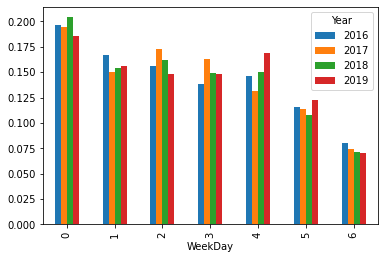

In [6]:
(pivot / pivot.sum())['CashIn'].plot(kind='bar')

In [7]:
(df.groupby(['Year', 'WeekDay'])[['CashIn', 'CashOut']].mean() / 
 df.groupby(['Year', 'WeekDay'])[['CashIn', 'CashOut']].mean().groupby(level=0).sum()).sort_index()

CashIn   CashOut
Year WeekDay                    
2016 0        0.196377  0.173097
     1        0.167421  0.158804
     2        0.155888  0.142802
     3        0.138340  0.132159
     4        0.146089  0.148093
     5        0.115538  0.164233
     6        0.080347  0.080811
2017 0        0.194604  0.150837
     1        0.149973  0.156049
     2        0.172911  0.156892
     3        0.163053  0.149668
     4        0.131608  0.152143
     5        0.113875  0.156663
     6        0.073977  0.077748
2018 0        0.204081  0.164964
     1        0.153906  0.149710
     2        0.162192  0.134762
     3        0.149701  0.142392
     4        0.150097  0.171056
     5        0.108326  0.168862
     6        0.071697  0.068254
2019 0        0.186140  0.169631
     1        0.156226  0.132029
     2        0.148115  0.145909
     3        0.147888  0.134095
     4        0.168509  0.194879
     5        0.122631  0.150936
     6        0.070490  0.072521

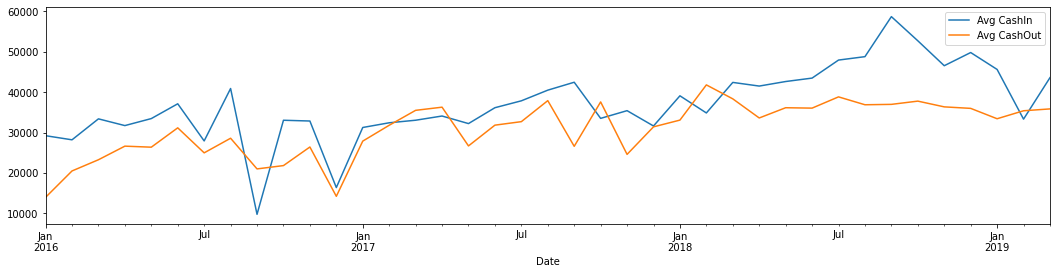

In [8]:
plt.figure(figsize=(18,4))
df.set_index('Date').resample("M")['CashIn'].mean().plot(label='Avg CashIn')
df.set_index('Date').resample("M")['CashOut'].mean().plot(label='Avg CashOut')
plt.legend()

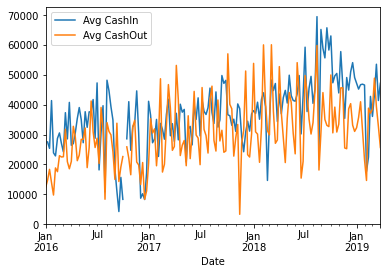

In [9]:
df.set_index('Date').resample("W")['CashIn'].mean().plot(label='Avg CashIn')
df.set_index('Date').resample("W")['CashOut'].mean().plot(label='Avg CashOut')
plt.legend()

<AxesSubplot:xlabel='WeekDay', ylabel='CashIn'>

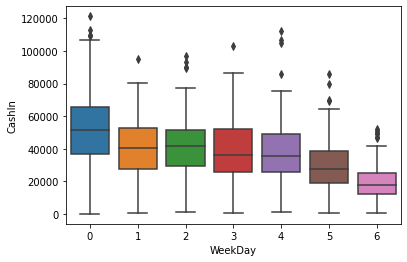

In [10]:
sns.boxplot(x=df['WeekDay'], y=df['CashIn'])

<AxesSubplot:xlabel='Month', ylabel='CashOut'>

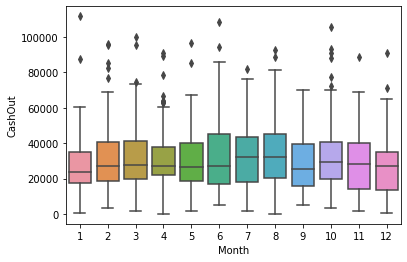

In [11]:
sns.boxplot(x=df['Month'], y=df['CashOut'])

<AxesSubplot:xlabel='Year', ylabel='CashIn'>

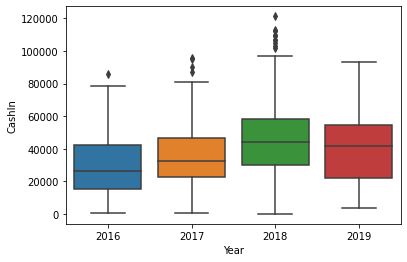

In [12]:
sns.boxplot(x=df['Year'], y=df['CashIn'])

<AxesSubplot:xlabel='WeekDay', ylabel='CashOut'>

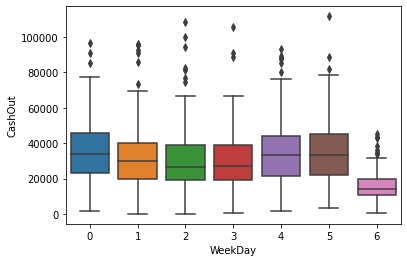

In [13]:
sns.boxplot(x=df['WeekDay'], y=df['CashOut'])

<AxesSubplot:xlabel='IsWeekend', ylabel='CashIn'>

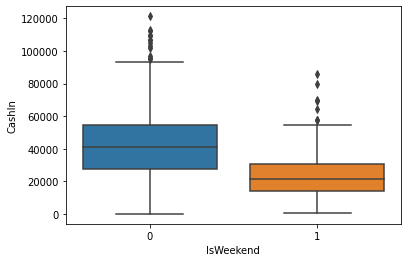

In [14]:
sns.boxplot(x=df['IsWeekend'], y=df['CashIn'])

<AxesSubplot:xlabel='CashIn', ylabel='Month'>

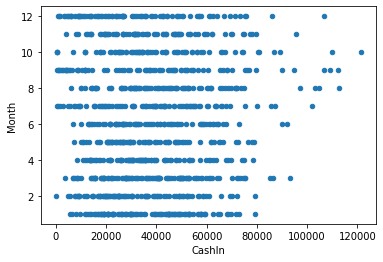

In [15]:
df.plot(kind='scatter', x='CashIn', y='Month')

In [16]:
df['Date'][0].isoweekday()

5

In [17]:
dfX = \
df.groupby(['Year', 'Month', 'WeekDay'])[['CashIn', 'CashOut']].mean() \
    .rename(lambda x: x + '_mean', axis=1) \
    .reset_index() \
    .merge(df) \
    .assign(
        CashIn=lambda df: df['CashIn'].fillna(df['CashIn_mean']),
        CashOut=lambda df: df['CashOut'].fillna(df['CashOut_mean']),   
    ) \
    .drop(['CashIn_mean', 'CashOut_mean'], 1) \
    .sort_values(['Date'])
dfX.head()

,Year,Month,WeekDay,Date,CashIn,CashOut,Day,IsWeekend
16,2016,1,4,2016-01-01,36380.000000,6500.0,1,0
21,2016,1,5,2016-01-02,13180.000000,23110.0,2,1
26,2016,1,6,2016-01-03,28860.000000,7070.0,3,1
0,2016,1,0,2016-01-04,34523.333333,18520.0,4,0
4,2016,1,1,2016-01-05,20840.000000,22200.0,5,0


In [18]:
X = dfX.drop(['CashIn', 'CashOut', 'Date'], 1)
y = dfX[['CashIn', 'CashOut']]

In [19]:
y.shift(1)

,CashIn,CashOut
16,NaN,NaN
21,36380.000000,6500.0
26,13180.000000,23110.0
0,28860.000000,7070.0
4,34523.333333,18520.0
...,...,...
1166,49270.000000,17860.0
1170,45160.000000,48600.0
1175,39480.000000,22840.0
1180,70260.000000,25950.0


In [20]:
def mape(y_true, y_pred):
    y_pred = y_pred[(y_true>0).all(axis=1)]
    y_true = y_true[(y_true>0).all(axis=1)]
    
    return np.abs((y_true - y_pred) / (y_true)).mean().mean() * 100.

In [21]:
def wape(y_true, y_pred):
    y_pred = y_pred[(y_true>0).all(axis=1)]
    y_true = y_true[(y_true>0).all(axis=1)]
    
    return np.abs((y_true - y_pred) / (y_true)).mean().mean() * 100.

In [22]:
from sklearn import pipeline, compose, linear_model, preprocessing, model_selection, feature_selection, tree, metrics

ml_pipe = \
pipeline.Pipeline(
    [
        ('encoder', compose.ColumnTransformer(
            [
                ('ohe', preprocessing.OneHotEncoder(categories='auto'), ['Month', 'Day', 'IsWeekend', 'Year'])
                ], remainder='passthrough')
            ),
        ('scaler', preprocessing.MaxAbsScaler()),
#         ('selector', feature_selection.SelectKBest(k=65, score_func=feature_selection.f_oneway)),
#         ('estimator', tree.DecisionTreeRegressor(max_depth=3)),
        ('estimator', linear_model.LinearRegression()),
        ]
)

In [266]:
cv_results = \
model_selection.cross_validate(
    ml_pipe, X, y, cv=model_selection.ShuffleSplit(n_splits=20, test_size=0.2),
    scoring={
        'r2': metrics.make_scorer(metrics.r2_score),
        'mae': metrics.make_scorer(metrics.mean_absolute_error),
        'mse': metrics.make_scorer(metrics.mean_squared_error),
        'mape': metrics.make_scorer(mape)
    },
    return_train_score=True
)
pd.DataFrame(cv_results).mean()

fit_time      1.125174e-02
score_time    1.716090e-02
test_r2       2.996449e-01
train_r2      3.676586e-01
test_mae      1.216643e+04
train_mae     1.160970e+04
test_mse      2.548308e+08
train_mse     2.311165e+08
test_mape     9.815135e+01
train_mape    1.042282e+02
dtype: float64

In [279]:
from sklearn import pipeline, compose, linear_model, preprocessing, model_selection, feature_selection, tree, metrics, ensemble

ml_pipe = \
pipeline.Pipeline(
    [
        ('encoder', compose.ColumnTransformer(
            [
                ('ohe', preprocessing.OneHotEncoder(categories='auto'), ['Month', 'Day', 'IsWeekend'])
                ], remainder='passthrough')
            ),
        ('scaler', preprocessing.MaxAbsScaler()),
#         ('selector', feature_selection.SelectKBest(k=65, score_func=feature_selection.f_oneway)),
#         ('estimator', tree.DecisionTreeRegressor(max_depth=3)),
#         ('estimator', ensemble.RandomForestRegressor(n_estimators=100, max_depth=20)),
        ('estimator', model_selection.GridSearchCV(
            ensemble.RandomForestRegressor(n_estimators=100),
            param_grid={
                "max_depth": [1, 10, 20, None],
                "min_samples_leaf": [1, 5, 10, 20],
                },
            cv=model_selection.KFold(n_splits=5, shuffle=True, random_state=42),
            )
            ),
        
        ]
)

cv_results = \
model_selection.cross_validate(
    ml_pipe, X, np.log(y + 1), cv=model_selection.ShuffleSplit(n_splits=30, test_size=0.3),
    scoring={
        'r2': metrics.make_scorer(metrics.r2_score),
        'mae': metrics.make_scorer(metrics.mean_absolute_error),
        'mse': metrics.make_scorer(metrics.mean_squared_error),
        'mape': metrics.make_scorer(mape)
    },
    return_train_score=True,
    n_jobs=-1
)
pd.DataFrame(cv_results).mean()

fit_time      21.680828
score_time     0.065400
test_r2        0.255188
train_r2       0.411122
test_mae       0.427840
train_mae      0.387939
test_mse       0.459536
train_mse      0.361943
test_mape      4.312624
train_mape     3.938474
dtype: float64

In [438]:
ml_pipe.fit(X.iloc[:-30], y.iloc[:-30])

c:\users\berk_\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
c:\users\berk_\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the 

c:\users\berk_\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
c:\users\berk_\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the 

c:\users\berk_\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
c:\users\berk_\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the 

c:\users\berk_\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
c:\users\berk_\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the 

c:\users\berk_\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
c:\users\berk_\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the 

c:\users\berk_\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
c:\users\berk_\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the 

Pipeline(memory=None,
         steps=[('encoder',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categorical_features=None,
                                                                categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                n_values=None,
                                                                sparse=True),
                                                  ['Month', 'Day',
                                              

In [439]:
ml_pipe.score(X.iloc[-30:], y.iloc[-30:])

c:\users\berk_\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.21715531553448786

In [280]:
ml_pipe.fit(X.iloc[:-60], y.iloc[:-60] + 1)


c:\users\berk_\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
c:\users\berk_\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the 

c:\users\berk_\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
c:\users\berk_\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the 

c:\users\berk_\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
c:\users\berk_\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the 

c:\users\berk_\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
c:\users\berk_\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the 

c:\users\berk_\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
c:\users\berk_\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the 

c:\users\berk_\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
c:\users\berk_\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the 

Pipeline(memory=None,
         steps=[('encoder',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categorical_features=None,
                                                                categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                n_values=None,
                                                                sparse=True),
                                                  ['Month', 'Day',
                                              

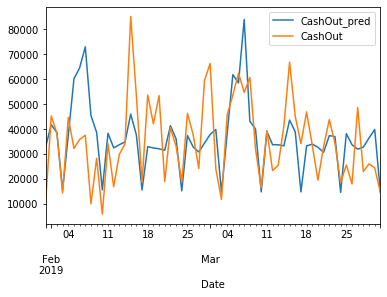

In [282]:

y_pred = ml_pipe.predict(X[-60:])
y_pred = pd.DataFrame(y_pred, index=df['Date'].iloc[-60:], columns=['CashIn_pred', 'CashOut_pred'])
y_pred['CashOut_pred'].plot()
y.set_index(df['Date']).iloc[-60:]['CashOut'].plot()
plt.legend()

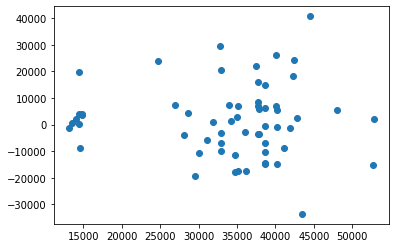

In [278]:
plt.scatter(np.exp(y_pred['CashOut_pred']), (y.iloc[-60:]['CashOut'] -np.exp( y_pred['CashOut_pred']).values))

In [283]:
X

,Year,Month,WeekDay,Day,IsWeekend
16,2016,1,4,1,0
21,2016,1,5,2,1
26,2016,1,6,3,1
0,2016,1,0,4,0
4,2016,1,1,5,0
...,...,...,...,...,...
1166,2019,3,2,27,0
1170,2019,3,3,28,0
1175,2019,3,4,29,0
1180,2019,3,5,30,1


In [23]:
future_dates = pd.Series(pd.date_range(start='2019-04-01', end='2019-04-30', freq='D'))
X_future = pd.DataFrame()
X_future['Year'] = future_dates.dt.year
X_future['Month'] = future_dates.dt.month
X_future['WeekDay'] = future_dates.dt.weekday
X_future['Day'] = future_dates.dt.day
X_future['IsWeekend'] = (X_future['WeekDay'] >= 5).astype(int)
X_future = X_future[X.columns]
X_future

,Year,Month,WeekDay,Day,IsWeekend
0,2019,4,0,1,0
1,2019,4,1,2,0
2,2019,4,2,3,0
3,2019,4,3,4,0
4,2019,4,4,5,0
5,2019,4,5,6,1
6,2019,4,6,7,1
7,2019,4,0,8,0
8,2019,4,1,9,0
9,2019,4,2,10,0


In [24]:
ml_pipe.predict(X_future)

NotFittedError: This ColumnTransformer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [306]:
from statsmodels import api as sm

In [80]:
ml_pipe_Arma = \
pipeline.Pipeline(
    [
        ('encoder', compose.ColumnTransformer(
            [
                ('ohe', preprocessing.OneHotEncoder(categories='auto', sparse=False, drop='first'), ['Month', 'Day', 'IsWeekend'])
                ], remainder='drop')
            ),
        ]
)

In [346]:
exog = ml_pipe_Arma.fit_transform(X.iloc[:-60])
endog = y['CashIn'].to_frame().set_index(df['Date'])['CashIn'].iloc[:-60]
model = sm.tsa.ARIMA(endog=endog, exog=exog, order=(3,1,3))
result = model.fit()

c:\users\berk_\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\berk_\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [483]:
exog = ml_pipe_Arma.fit_transform(X.iloc[:-30])
endog = y['CashIn'].to_frame().set_index(df['Date'])['CashIn'].iloc[:-30]
model = sm.tsa.SARIMAX(
    endog=endog,
    exog=exog,
    order=(3,0,3),
    seasonal_order=(0,0,0,7))
result = model.fit()

c:\users\berk_\appdata\local\programs\python\python37\lib\site-packages\numpy\linalg\linalg.py:1881: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)
c:\users\berk_\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\berk_\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [484]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                 CashIn   No. Observations:                 1156
Model:               SARIMAX(3, 0, 3)   Log Likelihood              -12889.613
Date:                Thu, 24 Dec 2020   AIC                          25877.227
Time:                        01:30:55   BIC                          26124.810
Sample:                    01-01-2016   HQIC                         25970.661
                         - 03-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          4837.4194   3578.306      1.352      0.176   -2175.931    1.19e+04
x2          8793.7041   4389.069      2.004      0.045     191.287    1.74e+04
x3          8696.7677   5590.023      1.556      0.120   -2259.477    1.97e+04
x4          8392.2197   5840.646      1.437      0.151   -3055.237    1.98e+04
x5          1.121e+04   5340.228      2.099      0.036     743.842    2.17e+04
x6          1.162e+04   5060.213      2.297      0.022    1706.845    2.15e+04
x7          1.585e+04   4801.913      3.301      0.001    6440.497    2.53e+04
x8          9257.3649   4747.665      1.950      0.051     -47.888    1.86e+04
x9          1.369e+04   4475.146      3.059      0.002    4918.754    2.25e+04
x10         1.087e+04   4654.525      2.336      0.019    1751.627       2e+04
x11         5874.9298   3924.400      1.497      0.134   -1816.753    1.36e+04
x12         3.427e+04   3125.483     10.966      0.000    2.81e+04    4.04e+04
x13         3.361e+04   3379.896      9.945      0.000     2.7e+04    4.02e+04
x14          3.31e+04   4363.846      7.586      0.000    2.46e+04    4.17e+04
x15         3.282e+04   3088.366     10.626      0.000    2.68e+04    3.89e+04
x16           3.6e+04   3217.968     11.188      0.000    2.97e+04    4.23e+04
x17         3.347e+04   3645.409      9.181      0.000    2.63e+04    4.06e+04
x18         3.802e+04   3305.644     11.502      0.000    3.15e+04    4.45e+04
x19         3.032e+04   3891.913      7.789      0.000    2.27e+04    3.79e+04
x20         2.716e+04   3589.499      7.566      0.000    2.01e+04    3.42e+04
x21         3.431e+04   3555.497      9.650      0.000    2.73e+04    4.13e+04
x22         2.776e+04   4253.673      6.525      0.000    1.94e+04    3.61e+04
x23         3.006e+04   3874.531      7.759      0.000    2.25e+04    3.77e+04
x24         2.839e+04   4183.250      6.787      0.000    2.02e+04    3.66e+04
x25         3.707e+04   3626.056     10.222      0.000       3e+04    4.42e+04
x26          3.59e+04   3674.855      9.769      0.000    2.87e+04    4.31e+04
x27         3.873e+04   3167.779     12.225      0.000    3.25e+04    4.49e+04
x28         3.051e+04   3955.189      7.714      0.000    2.28e+04    3.83e+04
x29          2.87e+04   3318.716      8.648      0.000    2.22e+04    3.52e+04
x30         3.223e+04   3642.081      8.849      0.000    2.51e+04    3.94e+04
x31         3.052e+04   3354.090      9.099      0.000    2.39e+04    3.71e+04
x32         3.333e+04   3907.228      8.530      0.000    2.57e+04     4.1e+04
x33         3.455e+04   3623.403      9.535      0.000    2.74e+04    4.17e+04
x34         3.517e+04   3876.142      9.073      0.000    2.76e+04    4.28e+04
x35         3.525e+04   3860.662      9.131      0.000    2.77e+04    4.28e+04
x36         3.406e+04   3381.731     10.072      0.000    2.74e+04    4.07e+04
x37         3.429e+04   3126.587     10.966      0.000    2.82e+04    4.04e+04
x38         3.184e+04   2977.494     10.694      0.000     2.6e+04    3.77e+04
x3

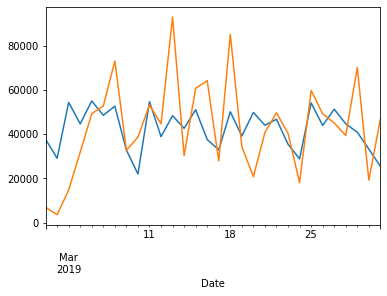

In [485]:
result.predict(start=df.iloc[-30:]['Date'].min(), end=df.iloc[-30:]['Date'].max(),
               exog=ml_pipe_Arma.transform(X.iloc[-30:])
              ).plot()
y.set_index(df['Date']).iloc[-30:]['CashIn'].plot()

(17866, 17927)

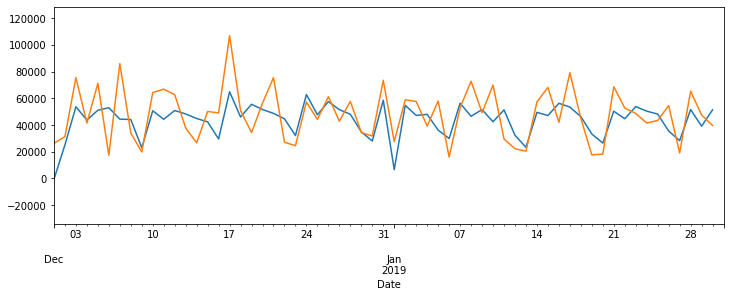

In [486]:
plt.figure(figsize=(12, 4))
result.predict(start=df.iloc[:-60]['Date'].min(), end=df.iloc[:-60]['Date'].max(),
               exog=ml_pipe_Arma.transform(X.iloc[:-60])
              ).plot()
y.set_index(df['Date']).iloc[:-60]['CashIn'].plot()
plt.xlim('2018-12-01', '2019-01-31')

In [487]:

np.linalg.cond(ml_pipe_Arma.transform(X))

inf

In [500]:
df.iloc[-30:]['Date'].max()

Timestamp('2019-03-31 00:00:00')

In [488]:
y_pred = result.predict(start=df.iloc[-30:]['Date'].min(), end=df.iloc[-30:]['Date'].max(),
               exog=ml_pipe_Arma.transform(X.iloc[-30:])
              )

In [489]:
metrics.r2_score(y['CashIn'].iloc[-30:], y_pred)

0.17918508295551294

In [492]:
y_pred.resample("W").sum()


2019-03-03     66929.937025
2019-03-10    310543.692183
2019-03-17    306621.531362
2019-03-24    294703.381479
2019-03-31    294188.659090
Freq: W-SUN, dtype: float64

In [83]:
ml_pipe_Arma.fit_transform(X).shape

(1186, 42)

In [131]:
import keras

In [327]:
dummy = pd.concat([
    y.shift(1),
#     pd.DataFrame(ml_pipe_Arma.fit_transform(X)).shift(1)
], axis=1, ignore_index=True)

lags = 5
forward = 2
Xt = pd.concat([
    pd.concat([
        y.shift(i),
#         pd.DataFrame(ml_pipe_Arma.fit_transform(X), index=y.index).shift(i)
    ], axis=1) for i in range(1,lags+1)
], axis=1).dropna().values.reshape(-1, lags, dummy.shape[1])[:-forward+1]
yt = pd.concat([y.shift(i) for i in range(0,-forward,-1)], axis=1).iloc[lags:-forward+1]

In [328]:
Xt.shape

(1180, 5, 2)

In [329]:
yt.shape

(1180, 4)

In [330]:
import keras
model = keras.models.Sequential()
model.add(keras.layers.LSTM(32, input_shape=(lags, Xt.shape[2]), return_sequences=True))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.LSTM(32, input_shape=(lags, 2), return_sequences=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(16, activation='relu'))
# model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(yt.shape[1], activation=None))
model.compile('adam', loss='mae', metrics=['mse'])

In [337]:
model.fit(
    Xt[:-30],
    yt[:-30],
    validation_data=(np.log(Xt[-30:] + 1), yt[-30:]),
    epochs=500,
    batch_size=256,
    )

Epoch 1/500
5/5 [==============================] - 0s 14ms/step - loss: 13638.1904 - mse: 339627936.0000 - val_loss: 28211.8652 - val_mse: 1136122368.0000
Epoch 2/500
5/5 [==============================] - 0s 9ms/step - loss: 13712.1504 - mse: 342563232.0000 - val_loss: 28405.5176 - val_mse: 1145911680.0000
Epoch 3/500
5/5 [==============================] - 0s 10ms/step - loss: 13633.9307 - mse: 337929536.0000 - val_loss: 33246.1797 - val_mse: 1444860672.0000
Epoch 4/500
5/5 [==============================] - 0s 10ms/step - loss: 13532.8457 - mse: 334247264.0000 - val_loss: 33582.0273 - val_mse: 1479744768.0000
Epoch 5/500
5/5 [==============================] - 0s 10ms/step - loss: 13536.9248 - mse: 333936512.0000 - val_loss: 33127.5000 - val_mse: 1452034944.0000
Epoch 6/500
5/5 [==============================] - 0s 10ms/step - loss: 13539.3877 - mse: 335082048.0000 - val_loss: 33166.7500 - val_mse: 1446855808.0000
Epoch 7/500
5/5 [==============================] - 0s 10ms/step - loss:

Epoch 54/500
5/5 [==============================] - 0s 10ms/step - loss: 13446.0264 - mse: 331543072.0000 - val_loss: 33297.3125 - val_mse: 1451776768.0000
Epoch 55/500
5/5 [==============================] - 0s 10ms/step - loss: 13519.0957 - mse: 335225056.0000 - val_loss: 33177.2461 - val_mse: 1453459968.0000
Epoch 56/500
5/5 [==============================] - 0s 10ms/step - loss: 13534.4375 - mse: 335315488.0000 - val_loss: 32828.3477 - val_mse: 1424001920.0000
Epoch 57/500
5/5 [==============================] - 0s 10ms/step - loss: 13555.8457 - mse: 335550304.0000 - val_loss: 33107.0664 - val_mse: 1438479488.0000
Epoch 58/500
5/5 [==============================] - 0s 10ms/step - loss: 13507.9180 - mse: 333320672.0000 - val_loss: 33283.4023 - val_mse: 1448257792.0000
Epoch 59/500
5/5 [==============================] - 0s 11ms/step - loss: 13498.8789 - mse: 335239392.0000 - val_loss: 33308.8281 - val_mse: 1450815232.0000
Epoch 60/500
5/5 [==============================] - 0s 10ms/step

5/5 [==============================] - 0s 10ms/step - loss: 13478.3555 - mse: 329602016.0000 - val_loss: 33580.9258 - val_mse: 1472332160.0000
Epoch 159/500
5/5 [==============================] - 0s 9ms/step - loss: 13489.4482 - mse: 331173696.0000 - val_loss: 33533.5117 - val_mse: 1466052096.0000
Epoch 160/500
5/5 [==============================] - 0s 10ms/step - loss: 13423.1152 - mse: 327831136.0000 - val_loss: 33400.9492 - val_mse: 1462336128.0000
Epoch 161/500
5/5 [==============================] - 0s 10ms/step - loss: 13385.7744 - mse: 325776608.0000 - val_loss: 33358.0117 - val_mse: 1462619904.0000
Epoch 162/500
5/5 [==============================] - 0s 10ms/step - loss: 13527.8867 - mse: 331351648.0000 - val_loss: 33370.3398 - val_mse: 1463372672.0000
Epoch 163/500
5/5 [==============================] - 0s 10ms/step - loss: 13397.6523 - mse: 325953056.0000 - val_loss: 33262.3750 - val_mse: 1453005312.0000
Epoch 164/500
5/5 [==============================] - 0s 9ms/step - loss: 

5/5 [==============================] - 0s 9ms/step - loss: 13397.2627 - mse: 328212800.0000 - val_loss: 31753.8086 - val_mse: 1335986432.0000
Epoch 263/500
5/5 [==============================] - 0s 9ms/step - loss: 13378.3672 - mse: 326330976.0000 - val_loss: 31774.4121 - val_mse: 1337889920.0000
Epoch 264/500
5/5 [==============================] - 0s 10ms/step - loss: 13348.1357 - mse: 326199008.0000 - val_loss: 31810.6230 - val_mse: 1341048448.0000
Epoch 265/500
5/5 [==============================] - 0s 9ms/step - loss: 13321.5830 - mse: 326030848.0000 - val_loss: 31791.8105 - val_mse: 1340257536.0000
Epoch 266/500
5/5 [==============================] - 0s 9ms/step - loss: 13345.9727 - mse: 327309152.0000 - val_loss: 31687.7480 - val_mse: 1333229824.0000
Epoch 267/500
5/5 [==============================] - 0s 9ms/step - loss: 13376.0938 - mse: 325692288.0000 - val_loss: 31594.5449 - val_mse: 1326762112.0000
Epoch 268/500
5/5 [==============================] - 0s 9ms/step - loss: 1328

5/5 [==============================] - 0s 10ms/step - loss: 13237.5664 - mse: 322683008.0000 - val_loss: 31723.5293 - val_mse: 1335423232.0000
Epoch 367/500
5/5 [==============================] - 0s 9ms/step - loss: 13164.9736 - mse: 320269408.0000 - val_loss: 31086.5508 - val_mse: 1289975424.0000
Epoch 368/500
5/5 [==============================] - 0s 9ms/step - loss: 13184.5596 - mse: 318973856.0000 - val_loss: 30481.5566 - val_mse: 1248824064.0000
Epoch 369/500
5/5 [==============================] - 0s 10ms/step - loss: 13124.0469 - mse: 318217696.0000 - val_loss: 30514.5449 - val_mse: 1250929920.0000
Epoch 370/500
5/5 [==============================] - 0s 9ms/step - loss: 13120.0469 - mse: 320146944.0000 - val_loss: 30092.4258 - val_mse: 1223886464.0000
Epoch 371/500
5/5 [==============================] - 0s 9ms/step - loss: 13008.9531 - mse: 312869824.0000 - val_loss: 29963.0117 - val_mse: 1215554432.0000
Epoch 372/500
5/5 [==============================] - 0s 9ms/step - loss: 130

5/5 [==============================] - 0s 10ms/step - loss: 13009.1445 - mse: 315929248.0000 - val_loss: 32184.2207 - val_mse: 1371617408.0000
Epoch 471/500
5/5 [==============================] - 0s 10ms/step - loss: 12933.9766 - mse: 312633792.0000 - val_loss: 31975.7227 - val_mse: 1357285760.0000
Epoch 472/500
5/5 [==============================] - 0s 10ms/step - loss: 12969.9180 - mse: 312371840.0000 - val_loss: 31678.3379 - val_mse: 1336248192.0000
Epoch 473/500
5/5 [==============================] - 0s 10ms/step - loss: 13042.5674 - mse: 315185152.0000 - val_loss: 31533.5742 - val_mse: 1322303488.0000
Epoch 474/500
5/5 [==============================] - 0s 9ms/step - loss: 12936.0117 - mse: 313065856.0000 - val_loss: 31604.5625 - val_mse: 1326199040.0000
Epoch 475/500
5/5 [==============================] - 0s 10ms/step - loss: 12974.9697 - mse: 313690784.0000 - val_loss: 31764.4453 - val_mse: 1343115520.0000
Epoch 476/500
5/5 [==============================] - 0s 9ms/step - loss: 

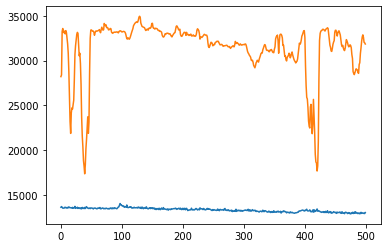

In [338]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])


In [339]:
y_pred = model.predict(Xt[-30:])

# plt.plot(y_pred[:,0])
# plt.plot(y['CashIn'].values[-30:])

In [341]:
pwd

'C:\\Users\\berk_\\OneDrive\\JWorkspace\\Yusu\\adem\\codefirst.io'

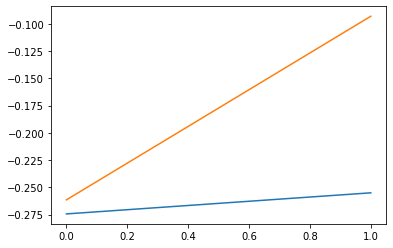

In [340]:
plt.plot([metrics.r2_score(yt.iloc[-30:, i], y_pred[:,i]) for i in range(0, y_pred.shape[1], 2)])
plt.plot([metrics.r2_score(yt.iloc[-30:, i], y_pred[:,i]) for i in range(1, y_pred.shape[1], 2)])


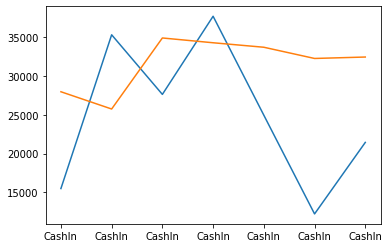

In [325]:
yt['CashIn'].loc[30].plot()
plt.plot(y_pred[0,0::2])

In [293]:
y_pred.shape

(30, 60)

In [541]:
BACK = -28
exog = ml_pipe_Arma.fit_transform(X.iloc[:BACK])
endog = y['CashIn'].to_frame().set_index(df['Date'])['CashIn'].iloc[:BACK]
model = sm.tsa.SARIMAX(
    endog=endog,
    exog=exog,
    order=(3,0,3),
    seasonal_order=(0,0,0,7))
result = model.fit()

y_pred = result.predict(start=df.iloc[BACK:]['Date'].min(), end=df.iloc[BACK:]['Date'].max(),
               exog=ml_pipe_Arma.transform(X.iloc[BACK:])
              )

metrics.r2_score(
    y.set_index(df['Date']).iloc[BACK:]['CashIn'].resample("W").sum(),
    y_pred.resample("W").sum(),
)

c:\users\berk_\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\berk_\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


-1.6387344967683553

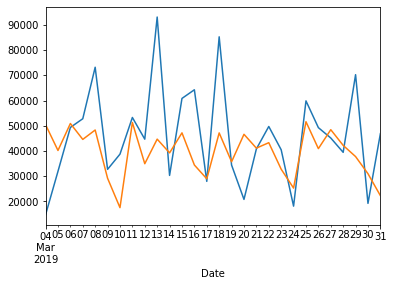

In [545]:
y.set_index(df['Date']).iloc[BACK:]['CashIn'].plot()
y_pred.plot()

In [543]:
y_pred.resample("W").sum()

2019-03-10    281248.915554
2019-03-17    280886.343747
2019-03-24    272103.443882
2019-03-31    274372.541322
Freq: W-SUN, dtype: float64

In [505]:
df['Date'].dt.week

0       53
1       53
2       53
3        1
4        1
        ..
1181    13
1182    13
1183    13
1184    13
1185    13
Name: Date, Length: 1186, dtype: int64

In [515]:
percents = (dfX.iloc[-37:-30].groupby('WeekDay')['CashIn'].sum() \
    / dfX.iloc[-37:-30]['CashIn'].sum())

In [517]:
weekly = y_pred.resample("W").sum()

In [523]:
weekly

2019-03-03     66929.937025
2019-03-10    310543.692183
2019-03-17    306621.531362
2019-03-24    294703.381479
2019-03-31    294188.659090
Freq: W-SUN, dtype: float64

In [524]:
percents

WeekDay
0    0.212771
1    0.175428
2    0.108923
3    0.117556
4    0.167313
5    0.161558
6    0.056450
Name: CashIn, dtype: float64

In [529]:
percents.to_frame()

,CashIn
WeekDay,
0,0.212771
1,0.175428
2,0.108923
3,0.117556
4,0.167313
5,0.161558
6,0.056450
